<a href="https://colab.research.google.com/github/np03cs4a240249-ctrl/ai/blob/main/Week4_KNN_From_Scratch_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data = pd.read_csv('/content/drive/MyDrive/Bishal AI Nasty/diabetes_.csv')

data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [29]:
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data[invalid_zero_cols] = data[invalid_zero_cols].replace(0, np.nan)

for col in invalid_zero_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data.isnull().sum()


/tmp/ipython-input-3859961669.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [30]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

X.shape, y.shape


((768, 8), (768,))

In [31]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size = int(len(X) * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


In [32]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


In [33]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    return np.bincount(k_labels).argmax()


In [34]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([
        knn_predict_single(x, X_train, y_train, k)
        for x in X_test
    ])


In [35]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)

accuracy


np.float64(70.0)

In [36]:
def min_max_scaling(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = min_max_scaling(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


In [37]:
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
compute_accuracy(y_test_s, pred_scaled)


np.float64(71.30434782608695)

In [38]:
k_values = range(1, 16)

acc_original = []
acc_scaled = []

for k in k_values:
    acc_original.append(
        compute_accuracy(y_test, knn_predict(X_test, X_train, y_train, k))
    )
    acc_scaled.append(
        compute_accuracy(y_test_s, knn_predict(X_test_s, X_train_s, y_train_s, k))
    )


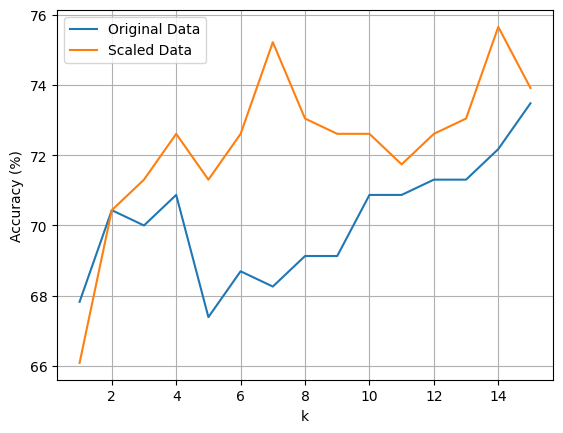

In [39]:
plt.plot(k_values, acc_original, label='Original Data')
plt.plot(k_values, acc_scaled, label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()
